# TASK 2 : PREDICTION USING UNSUPERVISED ML

In [22]:
import pandas as pd 
from sklearn import datasets

#upload data
iris_data = datasets.load_iris()
data_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
#display first 5 rows
data_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


C:\Users\hp2021\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

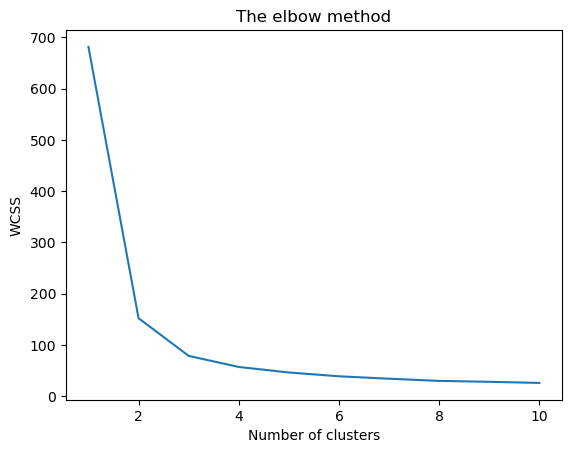

In [34]:
# Using the "elbow method" to find the optimal number of clusters for K-means clustering

x=data_df.iloc[:,[0, 1, 2, 3]].values

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss=[] # Within-Cluster Sum of Squares

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init ='k-means++', 
                   max_iter = 100, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
    
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show

In [36]:
#From the elbow method we can choose 3 as the aptimal number of clusters
#Now we apply kmeans to our dataset
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter = 300, n_init=10, random_state=0)
y_kmeans=kmeans.fit_predict(x)

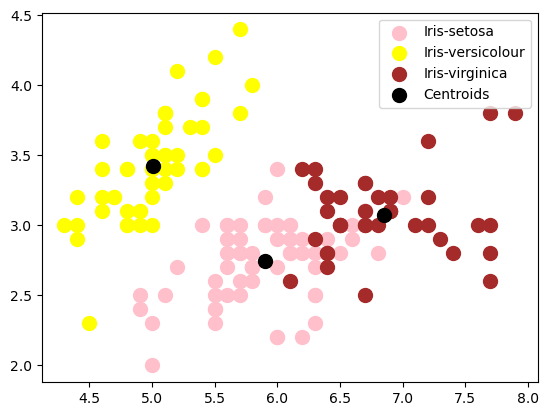

In [48]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'pink', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'brown', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()